In [1]:
import squidpy as sq
from ngff_tables_prototype.writer import write_spatial_anndata
import numpy as np

%load_ext autoreload
%autoreload 2
# %load_ext lab_black

In [2]:
adata = sq.datasets.mibitof()
lib_id = "point8"
spatial_key = "spatial"
adata = adata[adata.obs.library_id == lib_id].copy()
adata.uns[spatial_key][lib_id]["images"].keys()

dict_keys(['hires', 'segmentation'])

In [3]:
adata.uns[spatial_key][lib_id]["images"]["hires"].shape

(1024, 1024, 3)

In [4]:
image = adata.uns[spatial_key][lib_id]["images"]["hires"]
segment = adata.uns[spatial_key][lib_id]["images"]["segmentation"]

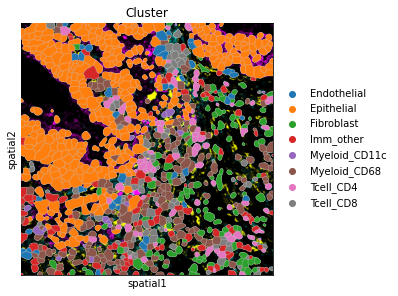

In [5]:
sq.pl.spatial_segment(
    adata,
    seg_cell_id="cell_id",
    library_key="library_id",
    color="Cluster",
    library_id="point8",
)

In [6]:
adata.X = adata.X.A.copy()
tables_adata = adata.copy()

In [7]:
write_spatial_anndata(
    file_path="test_segment.zarr",
    image_axes=["c", "y", "x"],
    image=np.swapaxes(image, 2, 0),
    label_image=segment,
    tables_adata=tables_adata,
    tables_instance_key="cell_id",
)

/Users/giovanni.palla/miniconda3/envs/squidpy/lib/python3.8/site-packages/zarr/creation.py:226: UserWarning: ignoring keyword argument 'maxshape'
  warn('ignoring keyword argument %r' % k)
